# Iris Flowers Classification ML Project

This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

 The data set contain 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

# Mounting Drive & Loading Dataset

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing  import binarize
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
iris = pd.read_csv("/content/drive/MyDrive/ LetsGrowMore Internship/Task-1/Iris.csv")

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Preprocessing

In [ ]:
# To display stats about data
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
# check for null values
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Exploratory Data Analysis

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
!pip install plotly matplotlib seaborn --quiet

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
fig = px.histogram(iris, 
                   x='Id', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Id')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(iris, 
                   x='Species', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of Species (Species)')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(iris, 
                   x='Id', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of Id (Id)')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(iris, 
                   x='Species', 
                   marginal='box', 
                   color='Species', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Species')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(iris, 
                   x='Id', 
                   marginal='box', 
                   color='Id', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Id')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
px.histogram(iris, x='Species', color='Id', title='Species')

In [ ]:
fig = px.scatter(iris, 
                 x='Id', 
                 y='Species', 
                 color='Id', 
                 opacity=0.8, 
                 hover_data=['Species'], 
                 title='Id vs. Species')
fig.update_traces(marker_size=5)
fig.show()

### Correlation

In [ ]:
iris.Id.corr(iris.Id)

1.0

In [ ]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


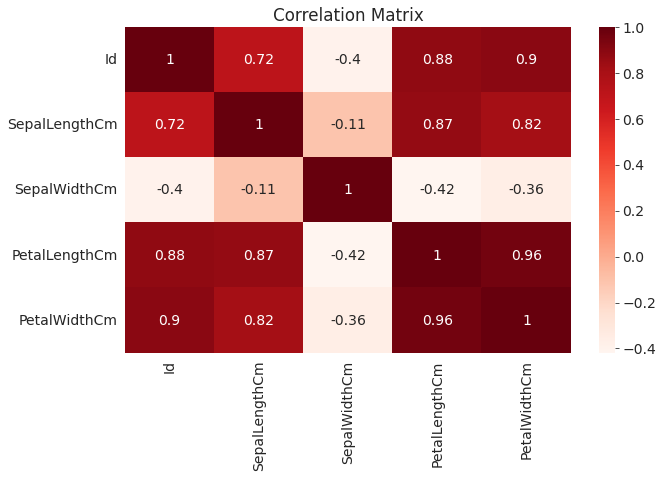

In [ ]:
sns.heatmap(iris.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

In [ ]:
iris.Id.corr(iris.Id)

1.0

In [ ]:
fig = px.strip(iris, x='Id', y='Species', title= "Id vs. Class")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

### Binary Categories

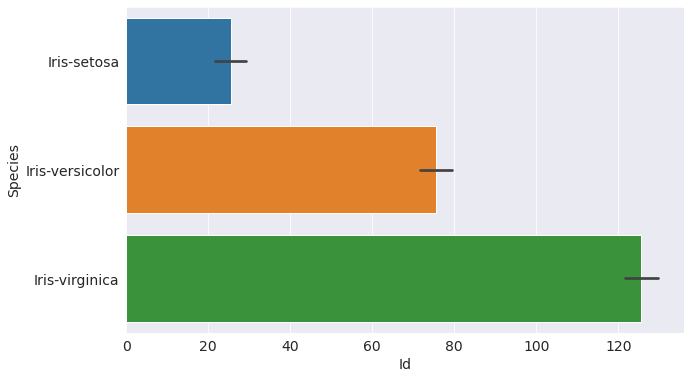

In [ ]:
sns.barplot(data=iris, x='Id', y='Species');

In [ ]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


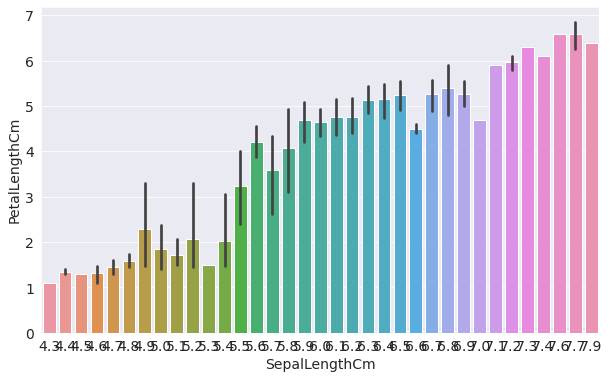

In [ ]:
sns.barplot(data=iris, x='SepalLengthCm', y='PetalLengthCm')

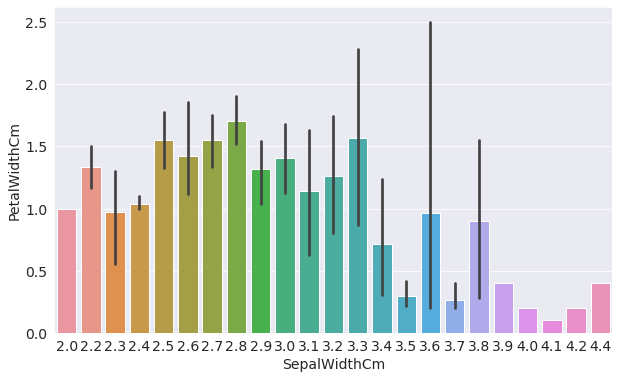

In [ ]:
sns.barplot(data=iris, x='SepalWidthCm', y='PetalWidthCm')